# Introducción a la inferencia estadística
# IE04 Distribuciones de probabilidad discretas




Nota: Parte de los contenios de este notebook están basados en el trabajo de Raúl E. López Briega. El contenido esta bajo la licencia BSD de Raúl E. López Briega.

## <font color='blue'>Distribuciones</font>

Ahora que ya conocemos como podemos hacer para representar a las distribuciones, pasemos a analizar cada una de ellas en más detalle para conocer su forma, sus principales aplicaciones y sus propiedades. Comencemos por las [distribuciones discretas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta).

<font color='red'>Nota:</font>
De cara a poder crear y trabajar con las distintas distribuciones de probabilidad en Python, utilizaremos la librería [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). Te recomensamos su revisión de forma independiente y autónoma.



In [1]:
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt

## <font color='blue'>Distribuciones Discretas</font>

Las distribuciones discretas son aquellas en las que la variable puede tomar solo algunos valores determinados. Los principales exponentes de este grupo son las siguientes: 

## Distribución Uniforme Discreta
Valores: $a, a+1, a+2,...,b$, números enteros.

Parámetros:<br>
$a$: mínimo, $a$ entero<br>
$b$: máximo, $b$ entero con $a < b$

Una [Distribución Uniforma Discreta](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme_discreta#:~:text=resultados%20diferentes%2C%20todos%20tienen%20la,determinada%20es%20de%201%2F6.), es aquella cuya variable aleatoria posee espacios de probabilidad equiprobables.
La distribución uniforme discreta describe el comportamiento de una variable discreta que puede tomar  $n$  valores distintos con la misma probabilidad cada uno de ellos. Esta distribución asigna igual probabilidad a todos los valores enteros entre el límite inferior y el límite superior que definen el recorrido de la variable. Si la variable puede tomar valores entre $a$ y $b$, debe ocurrir que  $b$  sea mayor que $a$, y la variable toma los valores enteros empezando por  $a, a+1, a+2,...$  hasta el valor máximo $b$ . Por ejemplo, cuando se observa el número obtenido tras el lanzamiento de un dado perfecto, los valores posibles siguen una distribución uniforme discreta en  $1,2,3,4,5,6$ , y la probabilidad de cada cara es 1/6.

La distribución está dada por la fórmula:

$$p(k; a, b) = \frac{1}{b - a} $$
con:
$$ a \le k \le b$$

In [ ]:
# Generamos una muestra de 1000 elementos, con 
# un valor mínimo a=-3 y un máximo b=11 (12 para obtener 11, recordar que se detiene justo antes)
a = -3
b = 12
uniforme_d = stats.randint(a, b)

In [ ]:
mean, var, skew, kurt = uniforme_d.stats(moments='mvsk')
print('Momentos')
print(f'Media = {mean: 4.2f}')
print(f'Varianza = {var: 4.2f}')
print(f'Asimetría (skewness) = {skew: 4.2f}')
print(f'Curtosis = {kurt: 4.2f}')

Momentos
Media =  4.00
Varianza =  18.67
Asimetría (skewness) =  0.00
Curtosis = -1.21


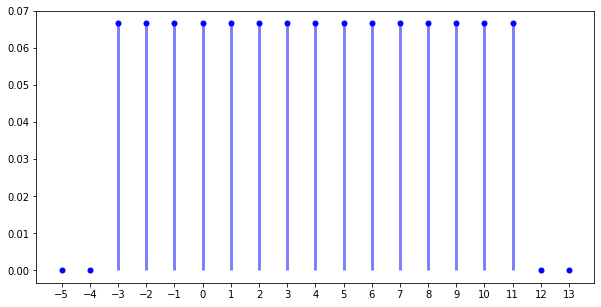

In [ ]:
# Veamos la función de probabilidad de masa
fig, ax = plt.subplots(1, 1, figsize=(10,5))
# generamos un rando uniformemente distribuido entre -5 y 14 para graficar la
# probabilidad de cada valor
# Ponemos dos valores antes y después para ver la probabilidad 0 de los mismos
x = np.arange(-5, b + 2)
ax.set_xticks(x)
ax.plot(x, uniforme_d.pmf(x,), 'bo', ms=5, label='randint pmf')
ax.vlines(x, 0, uniforme_d.pmf(x), colors='b', lw=3, alpha=0.5)
plt.show()

### <font color='green'>Actividad  1</font>

Genere 100 lanzamientos de un dado perfecto y calcule media, desviación estándar, mediana y moda.

Tip: utilice el método ```rvs```

In [ ]:
# Tu código aquí ...
from scipy import stats
import numpy as np

dados = stats.randint(1, 7).rvs(size= 100)
print(dados)

print(f'Media\t\t\t = {dados.mean(): 4.2f}')
print(f'Desviación estándar\t = {dados.std(): 4.2f}')
print(f'Mediana\t\t\t = {np.percentile(dados, 50): 4.2f}')
print(f'Moda\t\t\t = {stats.mode(dados, axis=None)[0][0]: 4.2f}')


[3 1 6 5 1 6 1 1 2 1 6 4 1 6 4 6 2 3 2 3 5 3 3 4 6 2 4 3 4 5 2 4 3 3 4 3 1
 3 5 6 6 1 4 3 5 2 1 6 6 3 1 2 3 2 3 6 5 5 2 4 5 5 2 5 3 4 6 5 4 5 3 3 6 4
 6 1 1 3 5 1 6 1 2 6 3 3 3 5 3 3 5 3 6 4 5 5 1 5 6 1]
Media			 =  3.60
Desviación estándar	 =  1.69
Mediana			 =  3.00
Moda			 =  3.00


[1 2 3 4 5 6]
[16 11 24 13 18 18]


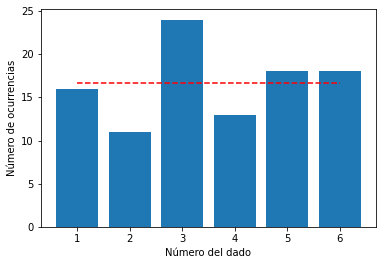

In [ ]:
#contar las ocurrencias de los dados
import matplotlib.pyplot as plt

dados_sort, dados_count = np.unique(dados, return_counts=True)

print(dados_sort)
print(dados_count)

plt.bar(dados_sort, dados_count)
plt.plot([1, 6], [100/6, 100/6], 'r--')
plt.xlabel('Número del dado')
plt.ylabel('Número de ocurrencias')
plt.show()

In [ ]:
#Que pasa si aumentamos las veces que se lanza el dado :

dados_full = stats.randint(1, 7).rvs(size= 10000)
print(dados_full)

print(f'Media\t\t\t = {dados_full.mean(): 4.2f}')
print(f'Desviación estándar\t = {dados_full.std(): 4.2f}')
print(f'Mediana\t\t\t = {np.percentile(dados_full, 50): 4.2f}')
print(f'Moda\t\t\t = {stats.mode(dados_full, axis=None)[0][0]: 4.2f}')

[1 1 2 ... 3 6 6]
Media			 =  3.53
Desviación estándar	 =  1.70
Mediana			 =  4.00
Moda			 =  4.00


[1 2 3 4 5 6]
[1637 1587 1692 1736 1653 1695]


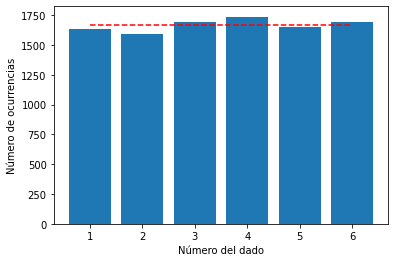

In [ ]:
dados_full_sort, dados_full_count = np.unique(dados_full, return_counts=True)

print(dados_full_sort)
print(dados_full_count)

plt.bar(dados_full_sort, dados_full_count)
plt.plot([1, 6], [10000/6, 10000/6], 'r--')
plt.xlabel('Número del dado')
plt.ylabel('Número de ocurrencias')
plt.show()

**_Conclusión_**: Mientras más cantidad de muestras, los lanzamientos de dados se distribuyen con probabilidad más equitativa de ocurrencia.

<font color='green'>Fin actividad 1</font>

## Distribución Binomial


Valores: $0, 1, 2, ..., n$

Parámetros:<br>
$N$: número de pruebas, $N \ge 1$ entero<br>
$p$: probabilidad de éxito, $0 \lt p \lt 1$

La [Distribución Binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) es una distribución discreta muy importante que surge en muchas aplicaciones bioestadísticas. Fue obtenida por Jakob Bernoulli (1654-1705) y publicada en su obra póstuma Ars Conjectandi en 1713.<br>
Esta distribución aparece de forma natural al realizar repeticiones independientes de un experimento que tenga respuesta binaria, generalmente clasificada como “éxito” o “fracaso”; este experimento recibe el nombre de experimento de Bernoulli. <br>

La distribución binomial esta dada por la formula:

$$p(r; N, p) = \left(\begin{array}{c} N \\ r \end{array}\right) p^r(1 - p)^{N - r}
$$

En dónde $r$ con la condición $0 \le r \le N$ y el parámetro $N$ ($N > 0$) son enteros; y el parámetro $p$ ($0 \le p \le 1$) es un número real. La Distribución Binomial describe la probabilidad de exactamente $r$ éxitos en $N$ pruebas si la probabilidad de éxito en una sola prueba es $p$.

Ejemplos de variables con respuesta binaria pueden ser: 
* el hábito de fumar (sí/no)
* si un paciente hospitalizado desarrolla o no una infección
* número de pacientes con cáncer de pulmón ingresados en una unidad hospitalaria
* si un artículo de un lote es o no defectuoso.


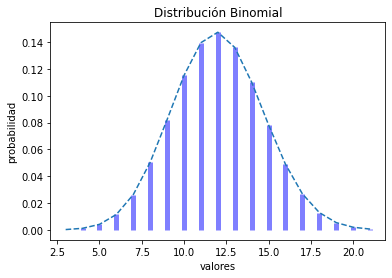

In [ ]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.0001),
              binomial.ppf(0.9999))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

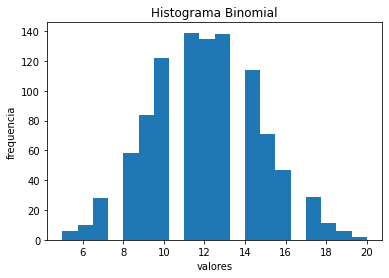

In [ ]:
# histograma
aleatorios_b = binomial.rvs(1000)  # genera aleatorios
frecuencias, bins, ignorar = plt.hist(aleatorios_b, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

In [ ]:
# Calculemos los parámetros de la población
print(f'Media poblacional\t\t= {aleatorios_b.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_b.std():4.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_b):4.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_b)[0][0]} y se repite {stats.mode(aleatorios_b)[1][0]} veces')

Media poblacional		= 11.93
Desviación estándar poblacional	= 2.68
Mediana poblacional		= 12.00
Moda poblacional es 11 y se repite 139 veces


### <font color='green'>Actividad 2</font>

En un examen formado por 20 preguntas, cada una de las cuales se responde declarando “verdadero” o “falso”, el alumno sabe que, históricamente, en el 75% de los casos la respuesta correcta es “verdadero” y decide responder al examen tirando dos monedas: pone “falso” si ambas monedas muestran una cara y “verdadero” si al menos hay una cruz. Se desea saber:
1. Cuál es la probabilidad de que tenga más de 14 aciertos?
2. Cuá es la media de aciertos mediante esta técnica (tirar dos monedas)?

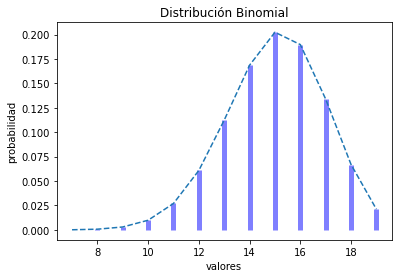

La probabilidad de tener más de 14 aciertos es 0.62
Media poblacional		= 15.00


In [ ]:
# Tu código aquí ...

N, p = 20, 3/4 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.0001),
              binomial.ppf(0.9999))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()


# 1. Cuál es la probabilidad de que tenga más de 14 aciertos?

p14mas = 1 - binomial.cdf(14)
print(f'La probabilidad de tener más de 14 aciertos es {p14mas:4.2f}')

# 2. Cuá es la media de aciertos mediante esta técnica (tirar dos monedas)?

print(f'Media poblacional\t\t= {binomial.mean():4.2f}')


<font color='green'>Fin actividad 2</font>

## Distribución Geométrica

Valores: $r: 0, 1, 2, ...$

Parámetros: $p$: probabilidad de éxito, $0 \lt p \lt 1$

La [Distribución Geométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_geom%C3%A9trica) esta dada por la formula:

$$p(r; p) = p(1- p)^{r-1}
$$

En donde $r \ge 1$  y el parámetro $p$ ($0 \le p \le 1$) es un número real. La Distribución Geométrica expresa la probabilidad de tener que esperar exactamente $r$ pruebas hasta encontrar el primer éxito si la probabilidad de éxito en una sola prueba es $p$. 

Supóngase que se efectúa repetidamente un experimento o prueba, que las repeticiones son independientes y que se está interesado en la ocurrencia o no de un suceso al que se refiere como “éxito”, siendo la probabilidad de este suceso $p$. La distribución geométrica permite calcular la probabilidad de que tenga que realizarse un número $r$ de repeticiones antes de obtener un éxito por primera vez; esta probabilidad decrece a medida que aumenta $r$ con lo que la función de masa de probabilidad es siempre decreciente. Así pues, se diferencia de la distribución binomial en que el número de repeticiones no está predeterminado, sino que es la variable aleatoria que se mide y, por otra parte, el conjunto de valores posibles de la variable es ilimitado.

Esta distribución presenta la propiedad denominada **falta de memoria**, que implica que la probabilidad de tener que esperar un tiempo t no depende del tiempo que ya haya
transcurrido.

Por ejemplo, en un proceso de selección, podría definir el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

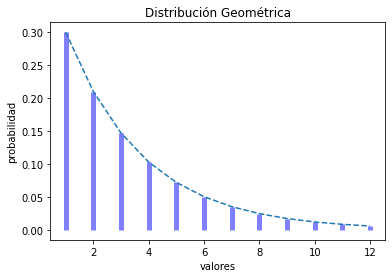

In [ ]:
# Graficando Geométrica
p =  0.3 # parametro de forma 
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

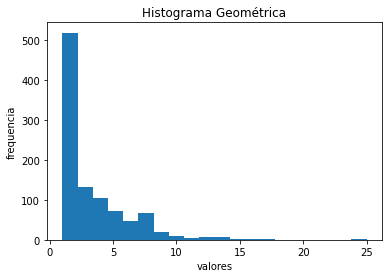

In [ ]:
# histograma
aleatorios_g = geometrica.rvs(1000)  # genera aleatorios
frecuencia, cajas, ignorar = plt.hist(aleatorios_g, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Geométrica')
plt.show()

In [ ]:
# Calculemos los parámetros de la población
print(f'Media poblacional\t\t= {aleatorios_g.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_g.std():4.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_g):4.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_g)[0][0]} y se repite {stats.mode(aleatorios_g)[1][0]} veces')

Media poblacional		= 3.35
Desviación estándar poblacional	= 2.80
Mediana poblacional		= 2.00
Moda poblacional es 1 y se repite 295 veces


###<font color='green'>Actividad 3</font>
La probabilidad de que cierto examen médico dé lugar a una reacción “positiva” es igual a 0,8, ¿cuál es la probabilidad de que ocurran menos de 5 reacciones “negativas” antes de la primera positiva? 
La variable aleatoria “número de reacciones negativas antes de la primera positiva” sigue una distribución geométrica con parámetro p = 0,8.

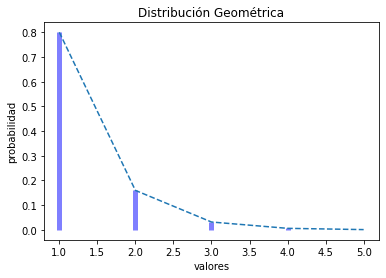

La probabilidad de tener menos de 5 reacciones negativas antes de la primera positiva es 1.00
La probabilidad de tener 5 reacciones negativas antes de la primera positiva es 0.0013


In [ ]:
# Tu código aquí ...

# X (variable aleatoria) = número de reacciones negativas antes de la primer positiva
# P(X=x) ~ Geometrica(p=0.8)

p =  0.8 # parametro de forma 
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.0001),
              geometrica.ppf(0.9999))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# 1. ¿Cuál es la probabilidad de que ocurran menos de 5 reacciones “negativas” antes de la primera positiva?
# se entiende a que se refiere que pueda haber 1, 2, 3, 4 ó 5 reacciones negativas

p5menos = geometrica.cdf(5)
print(f'La probabilidad de tener menos de 5 reacciones negativas antes de la primera positiva es {p5menos:4.2f}')

#si fuera la probabilidad de solo 5 reacciones negativas seria ...

p5 = geometrica.pmf(5)
print(f'La probabilidad de tener 5 reacciones negativas antes de la primera positiva es {p5:4.4f}')


<font color='green'>Fin actividad 3</font>

## Distribución Hipergeométrica
Valores: $r \in \{0,1,2,\dots, min\{M, N-M \}\}$

Parámetros:<br>
$N\in \{0,1,2,\dots \}$,  tamaño de la población<br> 
$M\in \{0,1,2,\dots ,N\}$, número de éxitos en la población<br>
$n\in \{0,1,2,\dots ,N\}$, número de pruebas
<br><br>
La [Distribución Hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica) esta dada por la formula:

$$p(r; n, N, M) = \frac{\left(\begin{array}{c} M \\ r \end{array}\right)\left(\begin{array}{c} N - M\\ n -r \end{array}\right)}{\left(\begin{array}{c} N \\ n \end{array}\right)}
$$

En dónde el valor de $r$ esta limitado por $\max(0, n - N + M)$ y $\min(n, M)$ inclusive; y los parámetros $n$ ($1 \le n \le N$), $N$ ($N \ge 1$) y $M$ ($M \ge 1$) son todos números enteros. La Distribución Hipergeométrica describe experimentos en donde se seleccionan los elementos al azar **sin reemplazo** (se evita seleccionar el mismo elemento más de una vez). Más precisamente, supongamos que tenemos $N$ elementos de los cuales $M$ tienen un cierto atributo (y $N - M$ no lo tiene). Si escogemos $n$ elementos al azar *sin reemplazo*, $p(r)$ es la probabilidad de que exactamente $r$ de los elementos seleccionados provienen del grupo con el atributo. 

Piénsese, por ejemplo, en un procedimiento de control de calidad en una empresa farmacéutica, durante el cual se extraen muestras de las cápsulas fabricadas y se someten a análisis para determinar su composición. Durante las pruebas, las cápsulas son destruidas y no pueden ser devueltas al lote del que provienen. En esta situación, la variable que cuenta el número de cápsulas que no cumplen los criterios de calidad establecidos sigue una distribución hipergeométrica. Por tanto, esta distribución es la equivalente a la binomial, pero cuando el muestreo se hace sin reemplazo, de forma que la probabilidad de éxito no permanece constante a lo largo de las $n$ pruebas, a
diferencia de la distribución binomial.

Esta distribución se puede ilustrar del modo siguiente: se tiene una población finita con $N$ elementos, de los cuales $M$ tienen una determinada característica que se llama “éxito” (diabetes, obesidad, hábito de fumar, etc.). El número de “éxitos” en una muestra aleatoria de tamaño $n$, extraída sin reemplazo de la población, es una variable aleatoria con distribución hipergeométrica de parámetros $N$, $M$ y $n$.

Cuando el tamaño de la población es grande, los muestreos con y sin reemplazo son equivalentes, por lo que la distribución hipergeométrica se aproxima en tal caso a la binomial.

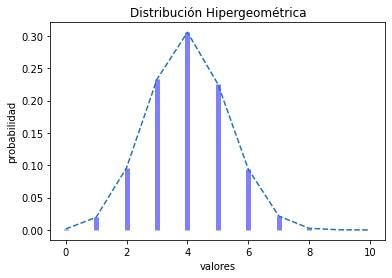

In [ ]:
# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

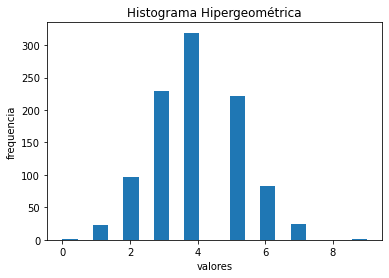

In [ ]:
# histograma
aleatorios_h = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios_h, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Hipergeométrica')
plt.show()

In [ ]:
# Calculemos los parámetros de la población
print(f'Media poblacional\t\t= {aleatorios_h.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_h.std():4.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_h):4.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_h)[0][0]} y se repite {stats.mode(aleatorios_h)[1][0]} veces')

Media poblacional		= 3.97
Desviación estándar poblacional	= 1.29
Mediana poblacional		= 4.00
Moda poblacional es 4 y se repite 319 veces


## Distribución de Bernoulli
Valores: $\{0, 1\}$

Parámetro: $p$, es la probabilidad de éxito en un solo ensayo.<br><br>
La [Distribución de Bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli) esta dada por la formula:

$$p(r;p) = \left\{
	\begin{array}{ll}
            1 - p = q  & \mbox{si } r = 0  \ \mbox{(fracaso)}\\
            p & \mbox{si } r = 1 \ \mbox{(éxito)}
	\end{array}
\right.$$

En dónde el parámetro $p$ es la probabilidad de éxito en un solo ensayo, la probabilidad de fracaso por lo tanto va a ser $1 - p$ (muchas veces expresada como $q$). Tanto $p$ como $q$ van a estar limitados al intervalo de cero a uno. La Distribución de Bernoulli describe un experimento probabilístico en donde el ensayo tiene dos posibles resultados, éxito o fracaso. Desde esta distribución se pueden deducir varias Funciones de Densidad de Probabilidad de otras distribuciones que se basen en una serie de ensayos **independientes**.

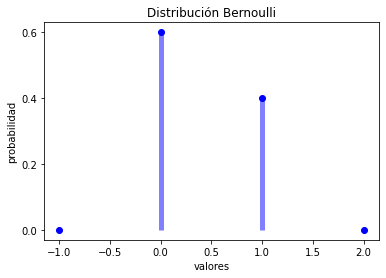

In [ ]:
# Graficando Bernoulli
p =  0.4 # parametro de forma 
bernoulli = stats.bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

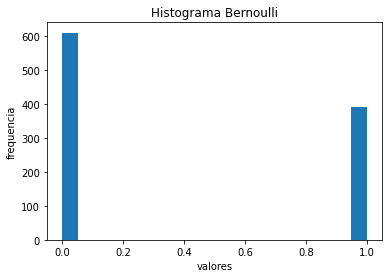

In [ ]:
# histograma
aleatorios_bll = bernoulli.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios_bll, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Bernoulli')
plt.show()

In [ ]:
# Calculemos los parámetros de la población
print(f'Media poblacional\t\t= {aleatorios_bll.mean():4.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_bll.std():4.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_bll):4.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_bll)[0][0]} y se repite {stats.mode(aleatorios_bll)[1][0]} veces')

Media poblacional		= 0.39
Desviación estándar poblacional	= 0.49
Mediana poblacional		= 0.00
Moda poblacional es 0 y se repite 609 veces


## Distribución Poisson

Valores: $0,1, 2, ...$

Parámetro: $\lambda$: tasa de ocurrencia, $\lambda \gt 0$, representa a la media de la población o muestra, es la tasa de ocurrencia (e.g., cantidad de personas promedio que llegan a una cola de un banco por unidad de tiempo (hora)

La [Distribución Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) debe su nombre al matemático francés Simeón Denis Poisson (1781-1840), aunque ya había sido introducida en 1718 por Abraham De Moivre (1667-1754) como una forma límite de la distribución binomial que surge cuando se observa un evento raro después de un número grande de repeticiones. 

La distribución de Poisson esta dada por la formula:

$$p(r; \lambda) = \frac{\lambda^r e^{-\lambda}}{r!}$$

En dónde $r$ es un entero ($r \ge 0$) y $\lambda$ es un número real positivo. La __Distribución Poisson__ describe la *probabilidad* de encontrar exactamente $r$ eventos en un lapso de tiempo si los acontecimientos se producen de forma independiente a una velocidad constante $\lambda$. Es una de las distribuciones más utilizadas en estadística con varias aplicaciones; como por ejemplo:

La distribución de Poisson también surge cuando un evento o suceso “raro” ocurre
aleatoriamente en el espacio o el tiempo. La variable asociada es el número de ocurrencias del evento en un intervalo o espacio continuo, por tanto, es una variable aleatoria discreta que toma valores enteros de 0 en adelante (0, 1, 2,...).  En general, es una distribución muy utilizada en diversas áreas de la investigación médica y, en particular, en epidemiología. Ejemplos de uso son:

* Cantidad de hijos
* Personas en una fila
* Camiones entrando a puerto 
* DPU (defectos por unidad)
* Pérdida de maletas por vuelo
* Número de pacientes que llegan a un consultorio en un lapso dado
* Número de llamadas que recibe un servicio de atención a urgencias durante 1 hora
* Número de células anormales en una superficie histológica
* Número de glóbulos blancos en un milímetro cúbico de sangre
* Número de fallos en un lote de materiales 


En general, la distribución de Poisson de parámetro $\lambda$ se puede utilizar como una aproximación de la binomial, $Bin(n, p)$, si el número de pruebas $n$ es grande, pero la probabilidad de éxito $p$ es pequeña, siendo $\lambda = np$;
podemos considerar que la aproximación Poisson-binomial es “buena” si $n \ge 20$ y $p \le 0,05$ y “muy buena” si $n \ge 100$ y $p \le 0,01$.

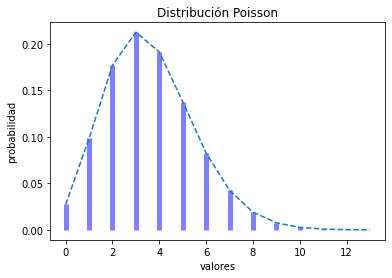

In [ ]:
# Graficando Poisson
l =  3.6 # parametro de forma 

# Creamos la distribución con un objeto de tipo "frozen"
# Este objeto conoce sus parámetros de forma; en este caso 'mu'
poisson = stats.poisson(l) 

x = np.arange(poisson.ppf(0.00001),
              poisson.ppf(0.99999))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

In [ ]:
#calculamos la probabilidad de al menos 3 eventos
p3 = poisson.pmf(3)
p3

0.21246926575014694

In [ ]:
#calculamos la probabilidad de que ocurran más de 8 eventos
p8min = 1 - poisson.cdf(8)
p8min

0.011671412238468237

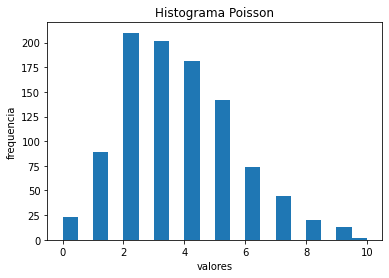

In [ ]:
# histograma
aleatorios_p = poisson.rvs(1000)  # genera aleatorios
frecuencias, bins, ignorar = plt.hist(aleatorios_p, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()

In [ ]:
# Calculamos los parámetros:
print(f'Media poblacional\t\t= {aleatorios_p.mean():>5.2f}')
print(f'Desviación estándar poblacional\t= {aleatorios_p.std():>5.2f}')
print(f'Mediana poblacional\t\t= {np.median(aleatorios_p):>5.2f}')
print(f'Moda poblacional es {stats.mode(aleatorios_p)[0][0]} y se repite {stats.mode(aleatorios_p)[1][0]} veces')

Media poblacional		=  3.60
Desviación estándar poblacional	=  1.90
Mediana poblacional		=  3.00
Moda poblacional es 2 y se repite 210 veces


###<font color='green'>Actividad 4</font>
El número de enfermos que solicitan atención de urgencia en un hospital durante un periodo de 24 horas tiene una media de 43,2 pacientes. Se sabe que el servicio se colapsará si el número de enfermos excede de 50. 
* ¿Cuál es la probabilidad de que se colapse el servicio de
urgencias del hospital? 
* Representar la función de masa de probabilidad.
* Representar la función acumulada.
* Obtener las funciones de distribución y densidad 

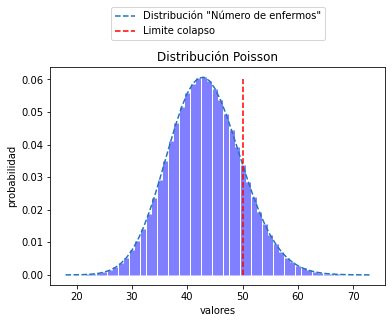

In [ ]:
# Definimos la variable aleatoria
# X = número de enfermos en la atención de urgencia de un hospital
# P(X=x) ~ Poisson(l=43.2)

# Definimos el parametros de forma de la distribución Poisson
l =  43.2 # parametro de forma 

# Creamos la distribución con un objeto de tipo "frozen"
# Este objeto conoce sus parámetros de forma; en este caso 'mu'
poisson = stats.poisson(l) 

x = np.arange(poisson.ppf(0.00001),
              poisson.ppf(0.99999))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--', label = 'Distribución "Número de enfermos"')
plt.plot([50,50],[0,0.06], 'r--', label= 'Limite colapso')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [ ]:
# 1. ¿Cuál es la probabilidad de que se colapse el servicio de urgencias del hospital?
p50min = 1 - poisson.cdf(50)
print(f'La probabilidad de que el servicio de urgencia colpase es de {p50min:.3f} ({p50min*100:.1f}%)')


La probabilidad de que el servicio de urgencia colpase es de 0.134 (13.4%)


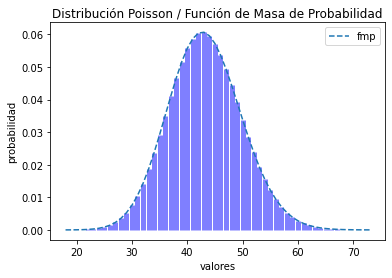

In [ ]:
# 2. Representar la función de masa de probabilidad.

x = np.arange(poisson.ppf(0.00001),
              poisson.ppf(0.99999))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--', label = 'fmp')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson / Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend()
plt.show()


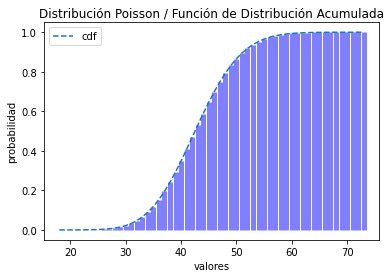

In [ ]:
# 3. Representar la función acumulada.

x = np.arange(poisson.ppf(0.00001),
              poisson.ppf(0.99999))
cdf = poisson.cdf(x) # Función de Masa de Probabilidad
plt.plot(x, cdf, '--', label = 'cdf')
plt.vlines(x, 0, cdf, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson / Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend()
plt.show()


In [ ]:
# 4. Obtener las funciones de distribución y densidad

**_R:_** Las funciones de distribución y densidad fueron calculadas y representadas anteriormente para la distribución Poisson

<font color='green'>Fin actividad 4</font>

## ¿Cómo elegir la distribución que mejor se ajusta a mis datos?

Ahora ya tenemos un conocimiento general de las principales distribuciones con que nos podemos encontrar; pero ¿cómo determinamos que distribución debemos utilizar?

Un modelo que podemos seguir cuando nos encontramos con datos que necesitamos ajustar a una distribución, es comenzar con los datos sin procesar y responder a cuatro preguntas básicas acerca de los mismos, que nos pueden ayudar a caracterizarlos. 

La **primer pregunta** se refiere a si los datos **pueden tomar valores discretos** o **continuos**. 

La **segunda pregunta** que nos debemos hacer, hace referencia a la [simetría](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) de los datos y, si es que hay asimetría, en qué dirección se encuentra; en otras palabras, son los [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) positivos y negativos igualmente probables o es uno más probable que el otro.

**La tercer pregunta** abarca los **límites superiores e inferiores en los datos**; hay algunos datos, como los ingresos, que no pueden ser inferiores a cero, mientras que hay otros, como los márgenes de operación que no puede exceder de un valor (100%). 

**La última pregunta** se refiere a la **posibilidad de observar valores extremos** en la distribución; en algunos casos, los valores extremos ocurren con muy poca frecuencia, mientras que en otros, se producen con mayor frecuencia.

Este proceso, lo podemos resumir en el siguiente gráfico:

<img alt="Distribuciones estadísticas" title="Distribuciones estadísticas" src="https://relopezbriega.github.io/images/distributions_choice.png" >

Con la ayuda de estas preguntas fundamentales, más el conocimiento de las distintas distribuciones deberíamos estar en condiciones de poder caracterizar cualquier conjunto de datos.